In [19]:
# Imports
import tensorflow
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Util functions
def plot_loss(model):
    # Display loss over training
    plt.plot(r.history["loss"], label="loss")
    plt.plot(r.history["val_loss"], label="val_loss")
    plt.title("Linear Model Loss")
    plt.show()

def plot_single_predictions(model):
    # Create some predictions (Single step)
    outputs = model.predict(X)
    predictions = outputs[:,0]

    plt.plot(Y, label="Targets")
    plt.plot(predictions, label="Predictions")
    plt.title("Linear Regression Predictions | Single step")
    plt.legend()
    plt.show()

def plot_full_predictions(model):
    # Create some predictions (Multi Step)
    validation_target = Y[-N//2:]
    validation_predictions = []

    # last train input
    last_x = X[-N//2]

    # This time use the predictions as inputs for the next predictions (shows true accuracy)
    while(len(validation_predictions) < len(validation_target)):
        p = model.predict(last_x.reshape(1, -1))[0][0] # array -> scalar

        validation_predictions.append(p)

        # Make a new input
        last_x = np.roll(last_x, -1)
        last_x[-1] = p

    # Plot the predictions and the true values
    plt.plot(validation_target, label="Targets")
    plt.plot(validation_predictions, label="Predictions")
    plt.title("Linear Regression Predictions | Multi Step")
    plt.legend()
    plt.show()

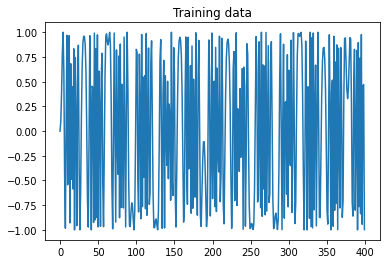

In [21]:
# Create dataset
series = np.sin(0.1 * np.arange(400) ** 2)
plt.plot(series)
plt.title("Training data")
plt.show()

# Block size for inputs
T = 10
D = 1
X = []
Y = []

# Loop over each possible block
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

# Convert and reshape to np array
X = np.array(X).reshape(-1, T) # Array shape is now N * T
Y = np.array(Y)
N = len(X)

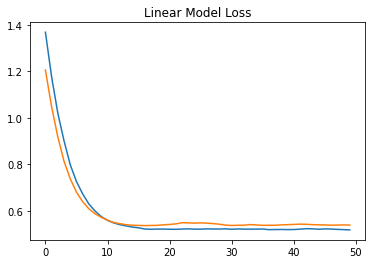

In [22]:
# Create linear model
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=50,
    validation_data=(X[-N//2:], Y[-N//2:]),
    verbose=0)

plot_loss(model)

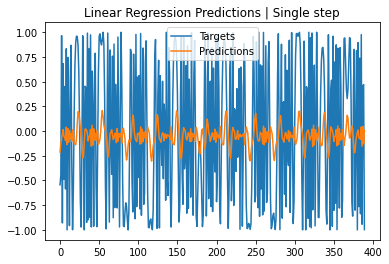

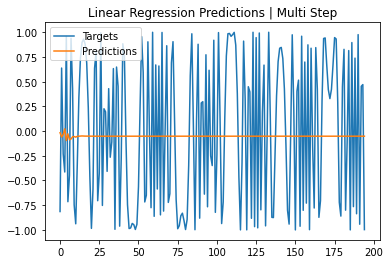

In [23]:
plot_single_predictions(model)
plot_full_predictions(model)

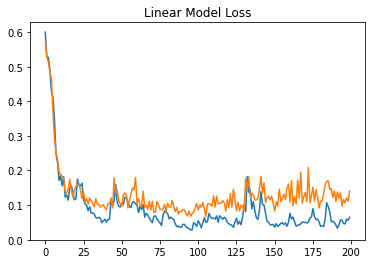

In [24]:
# Now trying an RNN
X = X.reshape(-1, T, 1)  # Reshape for the rnn
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=200,
    batch_size=32,
    validation_data=(X[-N//2:], Y[-N//2:]),
    verbose=0)

plot_loss(model)

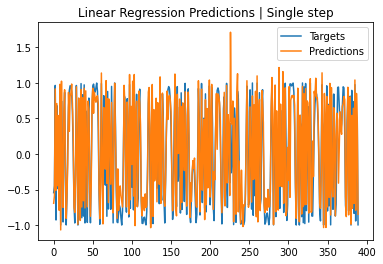

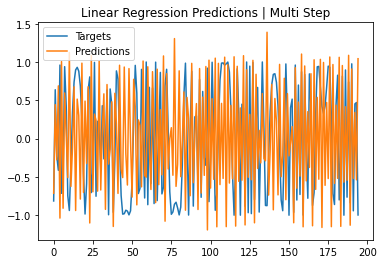

In [25]:
plot_single_predictions(model)
plot_full_predictions(model)

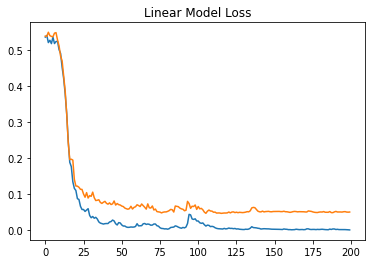

In [26]:
# Now trying an LSTM
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=200,
    batch_size=32,
    validation_data=(X[-N//2:], Y[-N//2:]),
    verbose=0)

plot_loss(model)

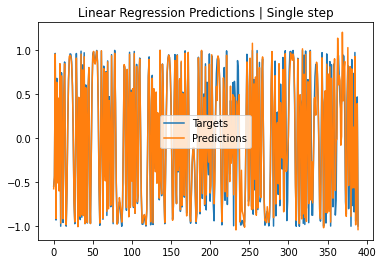

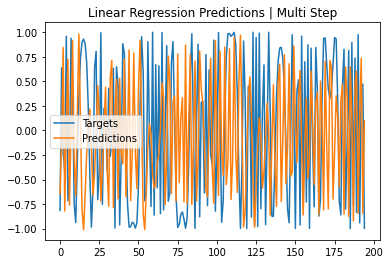

In [27]:
plot_single_predictions(model)
plot_full_predictions(model)